In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('pokemon_data.csv')
df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


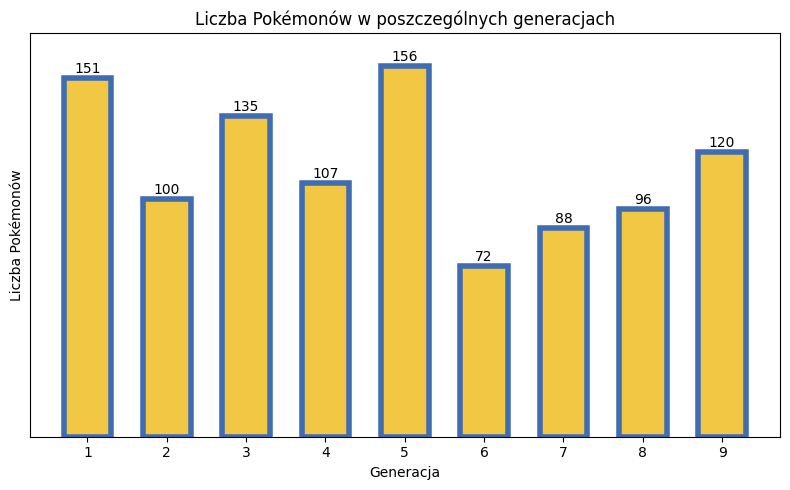

In [9]:
generation_counts = df['generation'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(generation_counts.index, generation_counts.values, color='#F1C744', edgecolor='#406DB1', width=0.6, linewidth=4)

# opisy osi i tytuł
plt.xlabel('Generacja')
plt.ylabel('Liczba Pokémonów')
plt.title('Liczba Pokémonów w poszczególnych generacjach')

for i, v in enumerate(generation_counts.values):
    plt.text(generation_counts.index[i], v + 2, str(v), ha='center')

plt.yticks([])
plt.xticks(range(1, df['generation'].max() + 1))
plt.ylim(0,170)
plt.tight_layout()
plt.show()